# seism
Strip chart example.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:12 AM.</small></i>

In [1]:
TStopwatch sw; sw.Start();

set time offset

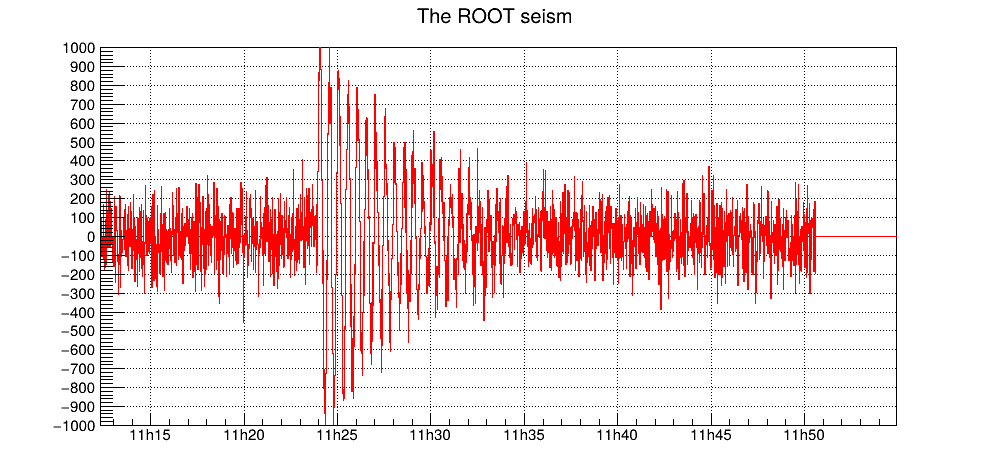

Real Time =    2.978s, Cpu Time =    2.740s


In [2]:
TDatime dtime;
gStyle->SetTimeOffset(dtime.Convert());

TCanvas *c1 = new TCanvas("c1","Time on axis",10,10,1000,500);
c1->SetGrid();

Float_t bintime = 1; //one bin = 1 second. change it to set the time scale
TH1F *ht = new TH1F("ht","The ROOT seism",10,0,10*bintime);
Float_t signalval = 1000;
ht->SetMaximum( signalval);
ht->SetMinimum(-signalval);
ht->SetStats(false);
ht->SetLineColor(2);
ht->GetXaxis()->SetTimeDisplay(1);
ht->GetYaxis()->SetNdivisions(520);
ht->Draw();

for (Int_t i=1;i<2300;i++) {
   //======= Build a signal : noisy damped sine ======
   Float_t noise  = gRandom->Gaus(0,120);
   if (i > 700) noise += signalval*sin((i-700.)*6.28/30)*exp((700.-i)/300.);
   ht->SetBinContent(i,noise);
   c1->Modified();
   c1->Update();
   gSystem->ProcessEvents(); //canvas can be edited during the loop
}
printf("Real Time = %8.3fs, Cpu Time = %8.3fs\n",sw.RealTime(),sw.CpuTime());

Draw all canvases 

In [3]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()